In [1]:
import os

In [2]:
import re

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cases2010to2018 = pd.read_csv('/content/drive/MyDrive/Law/Model1abData_2010to2018_merged_criminal_final.csv')




/tmp/ipython-input-97663527.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  cases2010to2018 = pd.read_csv('/content/drive/MyDrive/Law/Model1abData_2010to2018_merged_criminal_final.csv')


In [6]:
cases2010to2018.head()

,year,state_code,female_defendant,female_petitioner,female_adv_def,female_adv_pet,billable_ipc,female_judge_filing,female_judge_decision,judgediff,...,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,decision_judge_tenure_at_decision,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
0,2014,1,0,0 male,0,0,NaN,0 nonfemale,1 female,1.0,...,1_2_1,1_2,delayed,120.0,-171.0,Code of Criminal Procedure,.,NaN,District And Sessions Court,NaN
1,2015,1,0,0 male,0,0,NaN,0 nonfemale,0 nonfemale,1.0,...,1_2_1,1_2,delayed,22.0,-60.0,Code of Criminal Procedure,.,NaN,District And Sessions Court,NaN
2,2014,1,0,1 female,0,0,NaN,1 female,1 female,0.0,...,1_2_1,1_2,ontime,3.0,0.0,Code of Criminal Procedure,.,NaN,District And Sessions Court,NaN
3,2014,1,0,0 male,0,0,NaN,0 nonfemale,0 nonfemale,0.0,...,1_2_1,1_2,ontime,13.0,0.0,Code of Criminal Procedure,.,NaN,District And Sessions Court,NaN
4,2014,1,0,0 male,0,0,NaN,0 nonfemale,0 nonfemale,1.0,...,1_2_1,1_2,delayed,18.0,-60.0,Code of Criminal Procedure,.,NaN,District And Sessions Court,NaN


In [7]:
cases2010to2018.dtypes

,0
year,int64
state_code,int64
female_defendant,int64
female_petitioner,object
female_adv_def,int64
female_adv_pet,int64
billable_ipc,object
female_judge_filing,object
female_judge_decision,object
judgediff,float64


In [8]:
cases2010to2018.count()

,0
year,82026
state_code,82026
female_defendant,82026
female_petitioner,82026
female_adv_def,82026
female_adv_pet,82026
billable_ipc,21000
female_judge_filing,82026
female_judge_decision,82026
judgediff,82026


In [9]:
for col in cases2010to2018.columns:
    if cases2010to2018[col].dtype == 'object':
        cases2010to2018[col] = cases2010to2018[col].astype('category')


In [10]:
# Rename 'billable_ipc' to 'bailable_ipc'
old_column_name = "billable_ipc"
new_column_name = "bailable_ipc"

# Get current column names
column_names = list(cases2010to2018.columns)

# Update the specific column name
column_index = column_names.index(old_column_name)
column_names[column_index] = new_column_name

# Assign back to DataFrame
cases2010to2018.columns = column_names
cases2010to2018['bailable_ipc'] = cases2010to2018['bailable_ipc'].astype('category')



In [11]:
cases2010to2018['state_code'] = cases2010to2018['state_code'].astype('category')
cases2010to2018['female_defendant'] = cases2010to2018['female_defendant'].astype('category')
cases2010to2018['female_adv_def'] = cases2010to2018['female_adv_def'].astype('category')
cases2010to2018['female_adv_pet'] = cases2010to2018['female_adv_pet'].astype('category')
cases2010to2018['judgediff'] = cases2010to2018['judgediff'].astype('category')
cases2010to2018['muslim_adv_def'] = cases2010to2018['muslim_adv_def'].astype('category')
cases2010to2018['muslim_adv_pet'] = cases2010to2018['muslim_adv_pet'].astype('category')


In [12]:
cases2010to2018.dtypes

,0
state_code,category
female_defendant,category
female_petitioner,category
female_adv_def,category
female_adv_pet,category
bailable_ipc,category
female_judge_filing,category
female_judge_decision,category
judgediff,category
pendency_first_filing,float64


In [12]:
#Remove all columns not available at time of case filing

# List of columns to keep
columns_to_keep = cases2010to2018.columns.tolist()

# Remove specific columns from the list
for col in ["female_judge_decision", "decision_judge_tenure_at_decision", "pendency_first_filing", "judgediff","year"]:
    if col in columns_to_keep:
        columns_to_keep.remove(col)

# Subset the DataFrame to keep only desired columns
cases2010to2018 = cases2010to2018[columns_to_keep]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[6601 1253]
 [1621 2829]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      7854
           1       0.69      0.64      0.66      4450

    accuracy                           0.77     12304
   macro avg       0.75      0.74      0.74     12304
weighted avg       0.76      0.77      0.76     12304

Accuracy Score: 0.7664174252275683
AUC Score: 0.8465


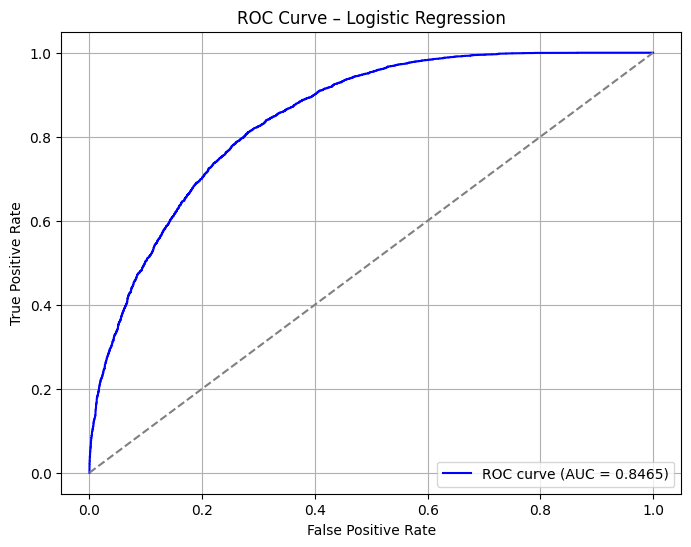

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# ✅ Step 1: Define features (X) and target (y)
X = cases2010to2018.drop(columns=["pendency_model_multiyear"])
y = cases2010to2018["pendency_model_multiyear"]
y = y.map({'ontime': 0, 'delayed': 1})


# ✅ Step 2: Handle categorical variables (convert to dummies)
X = pd.get_dummies(X, drop_first=True)

# ✅ Step 3: Train-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Step 4: Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Step 5: Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# ✅ Step 6: Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ✅ Step 7: ROC and AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


# ✅ Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import f1_score


# Step 3: Find threshold with max F1
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold for max F1: {best_threshold:.4f}")
print(f"Max F1 Score: {best_f1:.4f}")

Best threshold for max F1: 0.3466
Max F1 Score: 0.7028


#### Remove Columns Related to Religion

In [15]:
#Remove all columns related to religion

# List of columns to keep
columns_to_keep = cases2010to2018.columns.tolist()

# Remove specific columns from the list
for col in ["muslim_adv_def", "muslim_petitioner", "muslim_defendant", "muslim_adv_pet"]:
    if col in columns_to_keep:
        columns_to_keep.remove(col)

# Subset the DataFrame to keep only desired columns
cases2010to2018 = cases2010to2018[columns_to_keep]


Confusion Matrix:
 [[6595 1259]
 [1617 2833]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      7854
           1       0.69      0.64      0.66      4450

    accuracy                           0.77     12304
   macro avg       0.75      0.74      0.74     12304
weighted avg       0.76      0.77      0.76     12304

Accuracy Score: 0.7662548764629389
AUC Score: 0.8465


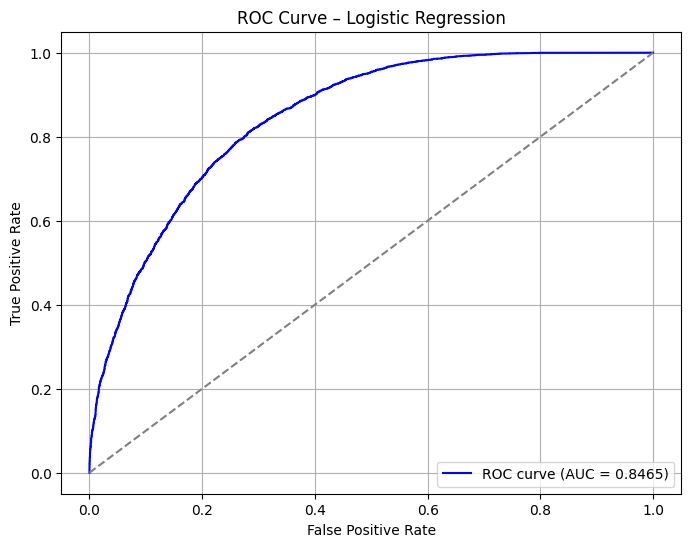

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# ✅ Step 1: Define features (X) and target (y)
X = cases2010to2018.drop(columns=["pendency_model_multiyear"])
y = cases2010to2018["pendency_model_multiyear"]
y = y.map({'ontime': 0, 'delayed': 1})


# ✅ Step 2: Handle categorical variables (convert to dummies)
X = pd.get_dummies(X, drop_first=True)

# ✅ Step 3: Train-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Step 4: Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Step 5: Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# ✅ Step 6: Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ✅ Step 7: ROC and AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


# ✅ Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import f1_score


# Step 3: Find threshold with max F1
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold for max F1: {best_threshold:.4f}")
print(f"Max F1 Score: {best_f1:.4f}")

Best threshold for max F1: 0.3466
Max F1 Score: 0.7026


#### Remove Columns Related to Gender

In [19]:
#Remove all columns related to religion

# List of columns to keep
columns_to_keep = cases2010to2018.columns.tolist()

# Remove specific columns from the list
for col in ["female_adv_def", "female_petitioner", "female_defendant", "female_adv_pet", "female_judge_filing"]:
    if col in columns_to_keep:
        columns_to_keep.remove(col)

# Subset the DataFrame to keep only desired columns
cases2010to2018 = cases2010to2018[columns_to_keep]


Confusion Matrix:
 [[6601 1253]
 [1616 2834]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      7854
           1       0.69      0.64      0.66      4450

    accuracy                           0.77     12304
   macro avg       0.75      0.74      0.74     12304
weighted avg       0.76      0.77      0.76     12304

Accuracy Score: 0.7668237971391417
AUC Score: 0.8463


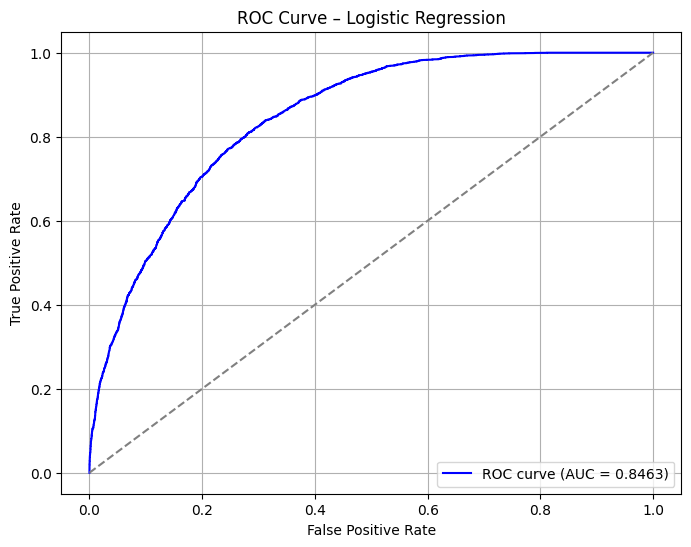

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# ✅ Step 1: Define features (X) and target (y)
X = cases2010to2018.drop(columns=["pendency_model_multiyear"])
y = cases2010to2018["pendency_model_multiyear"]
y = y.map({'ontime': 0, 'delayed': 1})


# ✅ Step 2: Handle categorical variables (convert to dummies)
X = pd.get_dummies(X, drop_first=True)

# ✅ Step 3: Train-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Step 4: Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Step 5: Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# ✅ Step 6: Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ✅ Step 7: ROC and AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


# ✅ Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import f1_score


# Step 3: Find threshold with max F1
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold for max F1: {best_threshold:.4f}")
print(f"Max F1 Score: {best_f1:.4f}")

Best threshold for max F1: 0.3192
Max F1 Score: 0.7020
